<a href="https://colab.research.google.com/github/MoazzemhossainMoazz/EDGE_AI/blob/main/Hart_disease_prediction_for_practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier

In [9]:
#loading the csv data to a pandas dataframe
heart_data = pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')

In [10]:
heart_data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70172,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,4.0,8.0
70173,0.0,0.0,0.0,1.0,28.0,0.0,0.0,2.0,1.0,1.0,...,1.0,1.0,3.0,0.0,0.0,0.0,0.0,8.0,6.0,7.0
70174,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,8.0,5.0,2.0
70175,0.0,1.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,6.0,0.0,0.0,0.0,9.0,5.0,8.0


In [11]:
#print firtst 5 rows of the dataset
heart_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [12]:
#print last 5 rows of the dataset
heart_data.tail()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70172,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,4.0,8.0
70173,0.0,0.0,0.0,1.0,28.0,0.0,0.0,2.0,1.0,1.0,...,1.0,1.0,3.0,0.0,0.0,0.0,0.0,8.0,6.0,7.0
70174,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,8.0,5.0,2.0
70175,0.0,1.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,6.0,0.0,0.0,0.0,9.0,5.0,8.0
70176,1.0,1.0,1.0,1.0,32.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,30.0,21.0,0.0,1.0,10.0,6.0,8.0


In [13]:
#number of rows and column in the dataset
heart_data.shape

(70177, 22)

In [14]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70177 entries, 0 to 70176
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  70177 non-null  float64
 1   HighBP                70177 non-null  float64
 2   HighChol              70177 non-null  float64
 3   CholCheck             70177 non-null  float64
 4   BMI                   70177 non-null  float64
 5   Smoker                70177 non-null  float64
 6   Stroke                70177 non-null  float64
 7   Diabetes              70177 non-null  float64
 8   PhysActivity          70177 non-null  float64
 9   Fruits                70177 non-null  float64
 10  Veggies               70177 non-null  float64
 11  HvyAlcoholConsump     70177 non-null  float64
 12  AnyHealthcare         70177 non-null  float64
 13  NoDocbcCost           70177 non-null  float64
 14  GenHlth               70177 non-null  float64
 15  MentHlth           

In [15]:
#checking for missing values
heart_data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [16]:
print(f"There are{heart_data.duplicated().sum()} duplicates data")
heart_data.loc[heart_data.duplicated(keep=False)].sort_values(by=heart_data.columns.to_list())

There are3469 duplicates data


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
7125,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
9414,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
27973,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
39317,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
10704,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47218,1.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
10462,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
16216,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
32663,1.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,1.0,13.0,4.0,7.0


In [17]:
heart_data.drop_duplicates(inplace=True)

In [18]:
#statistical measures about the data
heart_data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,66708.000000,66708.000000,66708.000000,66708.000000,66708.000000,66708.000000,66708.000000,66708.000000,66708.000000,66708.000000,...,66708.000000,66708.000000,66708.000000,66708.000000,66708.000000,66708.000000,66708.000000,66708.000000,66708.000000,66708.000000
mean,0.095791,0.442016,0.436814,0.961159,28.190082,0.453304,0.043068,0.309423,0.758320,0.629460,...,0.946918,0.088775,2.547895,3.329930,4.448582,0.172348,0.441206,8.147913,5.035723,6.005771
std,0.294306,0.496630,0.495995,0.193217,6.211994,0.497818,0.203012,0.708660,0.428105,0.482953,...,0.224199,0.284421,1.069083,7.482868,8.831130,0.377686,0.496535,3.105294,0.997966,2.081440
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,96.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [19]:
print(f"There are{heart_data.duplicated().sum()} duplicates data")
heart_data.loc[heart_data.duplicated(keep=False)].sort_values(by=heart_data.columns.to_list())

There are0 duplicates data


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


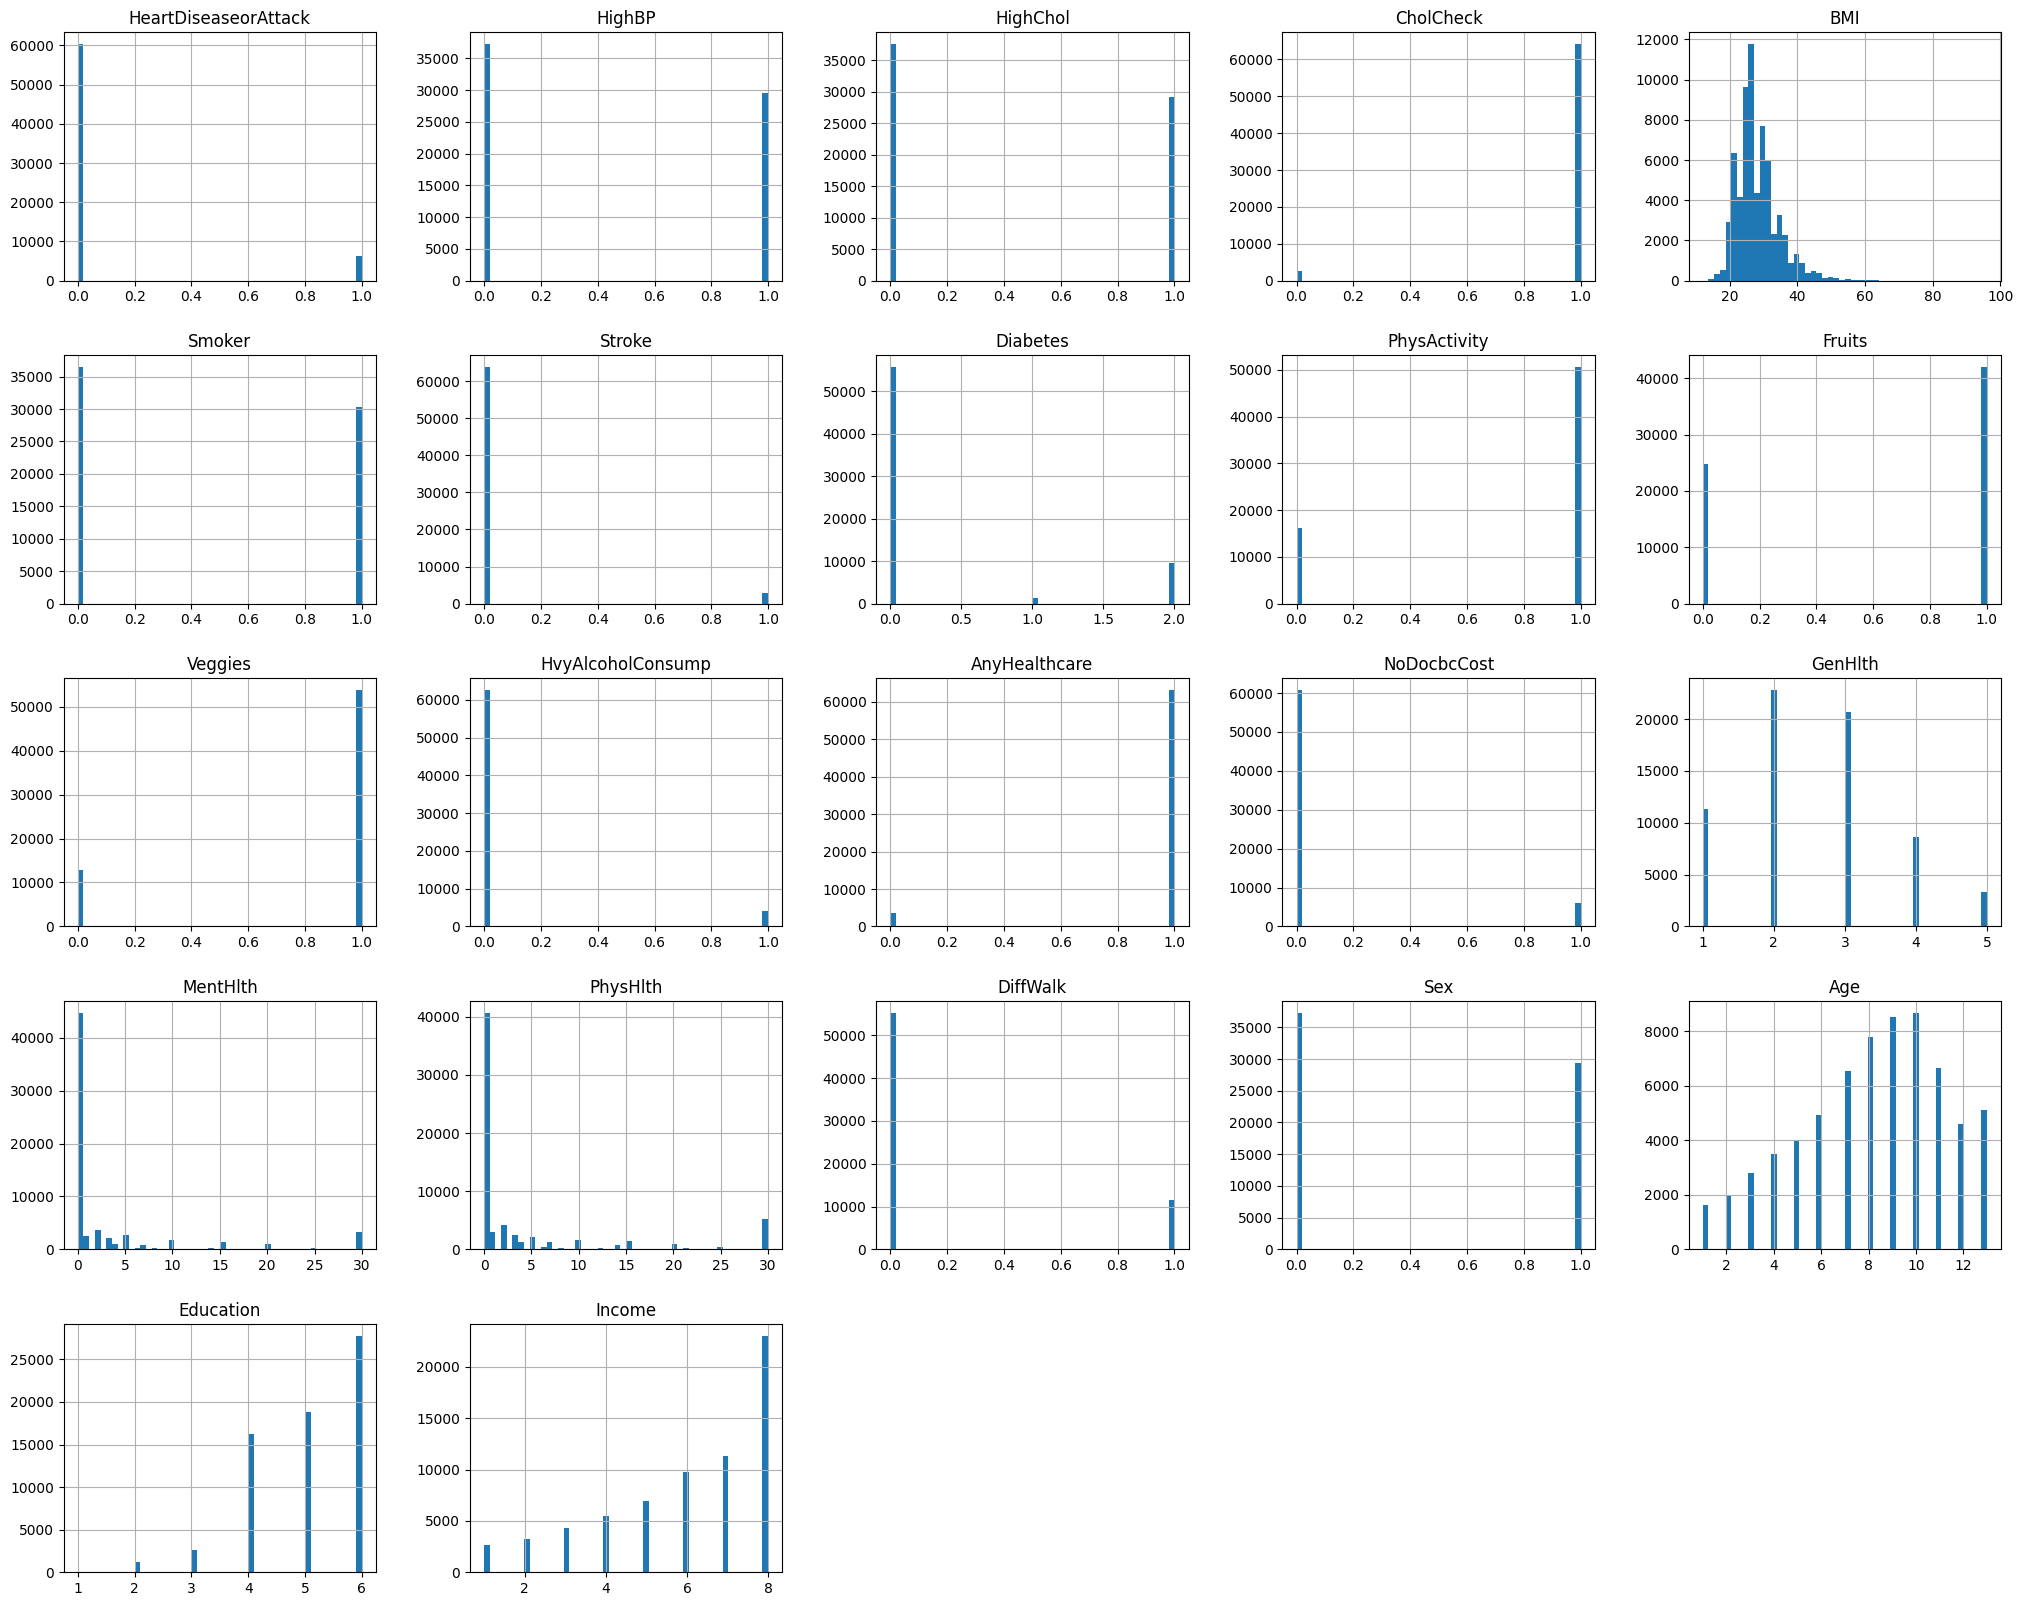

In [20]:
heart_data.hist(bins=50, figsize=(25, 20))
plt.show()

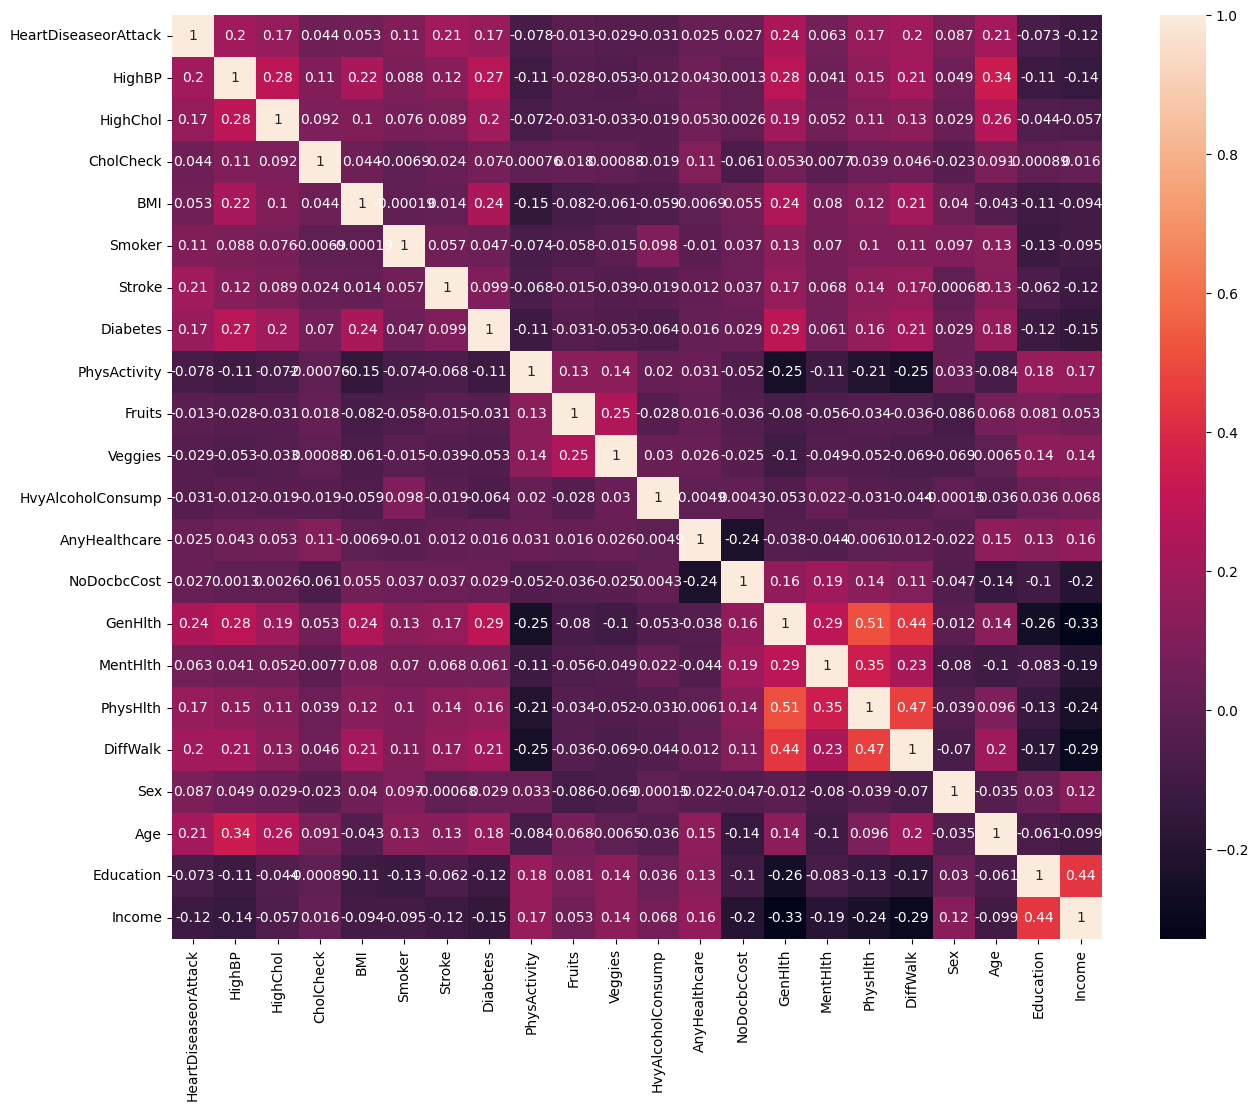

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(heart_data.corr(), annot=True)
plt.show()

In [22]:
correlation_matrix = heart_data.corr(method='pearson')
correlation_matrix

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.203848,0.168807,0.043812,0.053367,0.105019,0.205438,0.174862,-0.077774,-0.013315,...,0.025035,0.026635,0.240367,0.063127,0.170754,0.200773,0.086857,0.213156,-0.073461,-0.119689
HighBP,0.203848,1.000000,0.284943,0.105024,0.221585,0.088459,0.124464,0.268064,-0.110546,-0.028141,...,0.042569,0.001314,0.280957,0.040745,0.148553,0.213882,0.048608,0.336669,-0.112074,-0.140035
HighChol,0.168807,0.284943,1.000000,0.092101,0.104909,0.075720,0.089480,0.200654,-0.071777,-0.031405,...,0.052812,0.002570,0.190288,0.052246,0.112669,0.134276,0.028529,0.260251,-0.043912,-0.057359
CholCheck,0.043812,0.105024,0.092101,1.000000,0.043570,-0.006934,0.023920,0.070147,-0.000760,0.017821,...,0.111938,-0.060827,0.052658,-0.007653,0.039168,0.045513,-0.023100,0.091351,-0.000890,0.015728
BMI,0.053367,0.221585,0.104909,0.043570,1.000000,-0.000189,0.014204,0.235290,-0.150888,-0.082485,...,-0.006920,0.055018,0.243215,0.080222,0.120203,0.205893,0.040162,-0.042588,-0.106135,-0.093516
Smoker,0.105019,0.088459,0.075720,-0.006934,-0.000189,1.000000,0.056909,0.047480,-0.073706,-0.057877,...,-0.010322,0.036584,0.133941,0.070237,0.100685,0.105992,0.097299,0.128124,-0.125986,-0.094509
Stroke,0.205438,0.124464,0.089480,0.023920,0.014204,0.056909,1.000000,0.099097,-0.068417,-0.015051,...,0.012353,0.036594,0.167973,0.068072,0.144716,0.168306,-0.000682,0.125081,-0.061683,-0.118690
Diabetes,0.174862,0.268064,0.200654,0.070147,0.235290,0.047480,0.099097,1.000000,-0.111796,-0.031260,...,0.015726,0.028976,0.289917,0.060630,0.163307,0.214211,0.028760,0.176715,-0.117460,-0.149623
PhysActivity,-0.077774,-0.110546,-0.071777,-0.000760,-0.150888,-0.073706,-0.068417,-0.111796,1.000000,0.127984,...,0.031426,-0.051681,-0.249320,-0.114379,-0.208124,-0.248327,0.033014,-0.083631,0.177264,0.170927
Fruits,-0.013315,-0.028141,-0.031405,0.017821,-0.082485,-0.057877,-0.015051,-0.031260,0.127984,1.000000,...,0.016049,-0.036196,-0.079790,-0.055867,-0.033996,-0.035660,-0.085972,0.068413,0.081211,0.053159


In [24]:
#checking the distribution of target variable
heart_data['Income'].value_counts()

8.0    23041
7.0    11306
6.0     9743
5.0     6954
4.0     5463
3.0     4320
2.0     3242
1.0     2639
Name: Income, dtype: int64

In [25]:
pip install featurewiz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 11.2 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2436 sha256=aa9b835ea978f029df6d83b115f41dfd02dc156e6dea5d7d6d385b5684116aea
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5ddef243c97f13c6cf579d7353d659e41a05c3a6
Successfully built feather-format


In [26]:
from featurewiz import featurewiz

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (66708, 22)
#### Single_Label Multi_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Multi_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
##################################

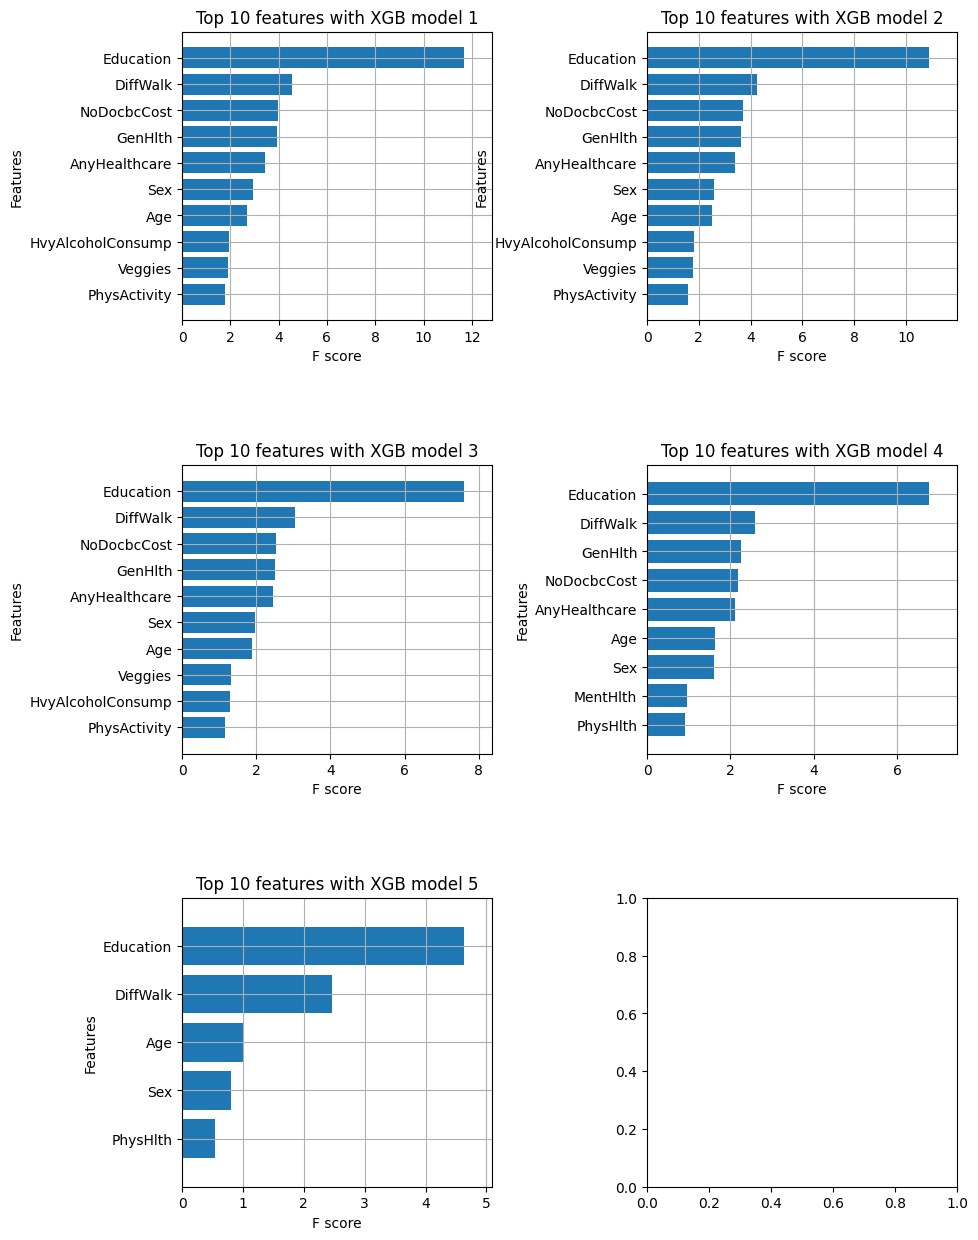

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 8 important features:
['Education', 'Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex']
Total Time taken for featurewiz selection = 186 seconds
Output contains a list of 8 important features and a train dataframe


In [28]:
target = 'Income'
features= featurewiz(heart_data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [29]:
x = heart_data.drop(columns='Income', axis=1)
y = heart_data['Income']


In [30]:
print(x)

       HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                       0.0     1.0       1.0        1.0  40.0     1.0   
1                       0.0     0.0       0.0        0.0  25.0     1.0   
2                       0.0     1.0       1.0        1.0  28.0     0.0   
3                       0.0     1.0       0.0        1.0  27.0     0.0   
4                       0.0     1.0       1.0        1.0  24.0     0.0   
...                     ...     ...       ...        ...   ...     ...   
70172                   0.0     0.0       0.0        1.0  26.0     1.0   
70173                   0.0     0.0       0.0        1.0  28.0     0.0   
70174                   0.0     0.0       0.0        1.0  26.0     1.0   
70175                   0.0     1.0       0.0        1.0  20.0     1.0   
70176                   1.0     1.0       1.0        1.0  32.0     1.0   

       Stroke  Diabetes  PhysActivity  Fruits  ...  HvyAlcoholConsump  \
0         0.0       0.0           0.0 

In [31]:
print(y)

0        3.0
1        1.0
2        8.0
3        6.0
4        4.0
        ... 
70172    8.0
70173    7.0
70174    2.0
70175    8.0
70176    8.0
Name: Income, Length: 66708, dtype: float64


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [33]:
print(x.shape, x_train.shape, x_test.shape)

(66708, 21) (53366, 21) (13342, 21)


In [34]:
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train.ravel())
predictions = rf1.predict(x_test)

print(classification_report(y_test, predictions))
#import result of mse
print("mse=", metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=", metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

         1.0       0.18      0.12      0.15       538
         2.0       0.16      0.10      0.12       667
         3.0       0.14      0.12      0.13       831
         4.0       0.16      0.14      0.15      1057
         5.0       0.15      0.12      0.13      1364
         6.0       0.19      0.16      0.17      1965
         7.0       0.15      0.11      0.13      2317
         8.0       0.49      0.70      0.57      4603

    accuracy                           0.32     13342
   macro avg       0.20      0.20      0.19     13342
weighted avg       0.27      0.32      0.29     13342

mse= 4.839979013641133
msle= 0.17019736355608903
mae= 1.5208364563034027
rmse= 2.1999952303678145


In [35]:
#Decison Tree
DT1 = DecisionTreeClassifier()
DT1.fit(x_train, y_train.ravel())
predictions1 = DT1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))


              precision    recall  f1-score   support

         1.0       0.11      0.10      0.10       538
         2.0       0.11      0.11      0.11       667
         3.0       0.12      0.13      0.13       831
         4.0       0.11      0.12      0.11      1057
         5.0       0.13      0.14      0.13      1364
         6.0       0.16      0.15      0.15      1965
         7.0       0.16      0.17      0.17      2317
         8.0       0.48      0.45      0.46      4603

    accuracy                           0.25     13342
   macro avg       0.17      0.17      0.17     13342
weighted avg       0.26      0.25      0.25     13342

mse= 5.860890421226203
msle= 0.2126565761081422
mae= 1.763153949932544
rmse= 2.420927595205235


In [37]:
# XGB classifier machine object
XGB1 = XGBClassifier()
# train the model on train set
XGB1.fit(x_train, y_train.ravel())
predictions2 = XGB1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

ValueError: ignored

In [38]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
# train the model on train set
KNN1.fit(x_train, y_train.ravel())
predictions3 = KNN1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

              precision    recall  f1-score   support

         1.0       0.13      0.16      0.14       538
         2.0       0.11      0.11      0.11       667
         3.0       0.14      0.13      0.13       831
         4.0       0.13      0.11      0.12      1057
         5.0       0.14      0.11      0.12      1364
         6.0       0.18      0.16      0.17      1965
         7.0       0.19      0.17      0.18      2317
         8.0       0.48      0.58      0.53      4603

    accuracy                           0.29     13342
   macro avg       0.19      0.19      0.19     13342
weighted avg       0.27      0.29      0.28     13342

mse= 5.840878429021136
msle= 0.21606530287597028
mae= 1.6951731374606507
rmse= 2.416790936142623


In [39]:
# support vector machine object
svm1 = SVC(kernel='linear')
# train the model on train set
svm1.fit(x_train, y_train.ravel())
predictions4 = svm1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       538
         2.0       0.00      0.00      0.00       667
         3.0       0.17      0.15      0.16       831
         4.0       0.19      0.05      0.08      1057
         5.0       0.15      0.04      0.07      1364
         6.0       0.16      0.12      0.14      1965
         7.0       0.09      0.00      0.00      2317
         8.0       0.42      0.96      0.59      4603

    accuracy                           0.37     13342
   macro avg       0.15      0.17      0.13     13342
weighted avg       0.23      0.37      0.25     13342

mse= 5.438914705441463
msle= 0.17202533823828278
mae= 1.5676810073452256
rmse= 2.332148088231419


In [40]:
pip install imblearn

In [41]:
from imblearn.over_sampling import SMOTE
sm_over = SMOTE(random_state=2)

In [42]:
x_train_res, y_train_res = sm_over.fit_resample(x_train, y_train.ravel())

In [43]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))



print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train== 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (147504, 21)
After OverSampling, the shape of train_y: (147504,) 

Before OverSampling, counts of label '1': 2101
Before OverSampling, counts of label '0': 0
After OverSampling, counts of label '1': 18438
After OverSampling, counts of label '0': 0


In [ ]:
#Decison Tree
DT = DecisionTreeClassifier()
DT.fit(x_train_res, y_train_res.ravel())
predictions1 = DT.predict(x_test)
# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

In [ ]:
# KNN classifier machine object
KNN =  KNeighborsClassifier()
# train the model on train set
KNN.fit(x_train_res, y_train_res.ravel())
predictions3 = KNN.predict(x_test)
# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

In [ ]:
# support vector machine object
svm = SVC(kernel='linear')
# train the model on train set
svm.fit(x_train_res, y_train_res.ravel())
predictions4 = svm.predict(x_test)
# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

In [ ]:
#apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

x_train_miss, y_train_miss = nr.fit_resample(x_train, y_train.ravel())

In [ ]:
#Near miss result
print('After undersampling, the shape of train_X: {}'.format(x_train_miss.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_miss.shape))




print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After undersampling, the shape of train_X: (192, 3)
After UnderSampling, the shape of train_y: (192,) 

Before UnderSampling, counts of label '1': 96
Before UnderSampling, counts of label '0': 120
After UnderSampling, counts of label '1': 96
After UnderSampling, counts of label '0': 96


In [ ]:
#Random Forest
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train_miss, y_train_miss.ravel())
predictions = rf2.predict(x_test)
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))


#Decison Tree
DT2 = DecisionTreeClassifier()
DT2.fit(x_train_miss, y_train_miss.ravel())
predictions1 = DT2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))





# XGB classifier machine object
XGB2 = XGBClassifier()
# train the model on train set
XGB2.fit(x_train_miss, y_train_miss.ravel())
predictions2 = XGB2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))




# KNN classifier machine object
KNN2 =  KNeighborsClassifier()
# train the model on train set
KNN2.fit(x_train_miss, y_train_miss.ravel())
predictions3 = KNN2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))







# support vector machine object
svm2 = SVC(kernel='linear')
# train the model on train set
svm2.fit(x_train_miss, y_train_miss.ravel())
predictions4 = svm2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

              precision    recall  f1-score   support

           0       0.58      0.37      0.45        30
           1       0.46      0.67      0.54        24

    accuracy                           0.50        54
   macro avg       0.52      0.52      0.50        54
weighted avg       0.52      0.50      0.49        54

mse= 0.5
msle= 0.24022650695910064
mae= 0.5
rmse= 0.7071067811865476
              precision    recall  f1-score   support

           0       0.61      0.47      0.53        30
           1       0.48      0.62      0.55        24

    accuracy                           0.54        54
   macro avg       0.55      0.55      0.54        54
weighted avg       0.55      0.54      0.54        54

mse= 0.46296296296296297
msle= 0.22243195088805617
mae= 0.46296296296296297
rmse= 0.6804138174397717
              precision    recall  f1-score   support

           0       0.61      0.37      0.46        30
           1       0.47      0.71      0.57        24

    accuracy

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [ ]:
# support vector machine object
svm = SVC(kernel='linear')
# train the model on train set
svm.fit(x_train_res, y_train_res.ravel())
predictions4 = svm.predict(x_test)
# print classification report
print(classification_report(y_test, predictions4))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        30
           1       0.50      0.75      0.60        24

    accuracy                           0.56        54
   macro avg       0.58      0.57      0.55        54
weighted avg       0.59      0.56      0.54        54



In [ ]:
Accuracy=accuracy_score(y_test, predictions4)
precision=precision_score(y_test, predictions4)
recall=recall_score(y_test, predictions4)
f1=f1_score(y_test, predictions4)
print('Accuracy=',Accuracy)
print('precision=',precision)
print('recall=',recall)
print('f1=',f1)

Accuracy= 0.5555555555555556
precision= 0.5
recall= 0.75
f1= 0.6


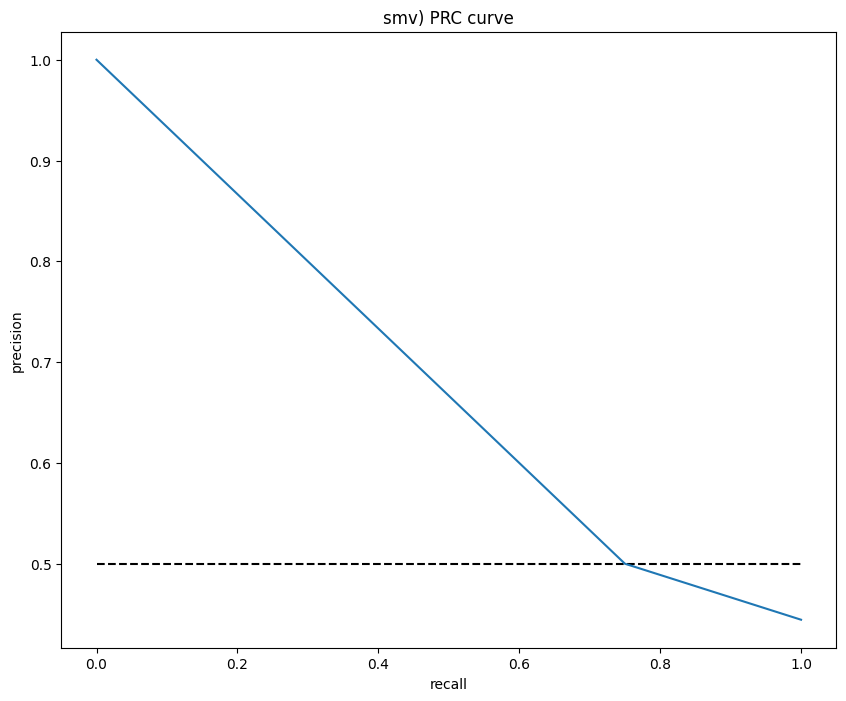

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions4)

plt.figure(figsize = (10, 8))
plt.plot([0, 1], [0.5, 0.5], 'k--')
plt.plot(recall, precision, label = 'svm')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('smv) PRC curve')
plt.show()

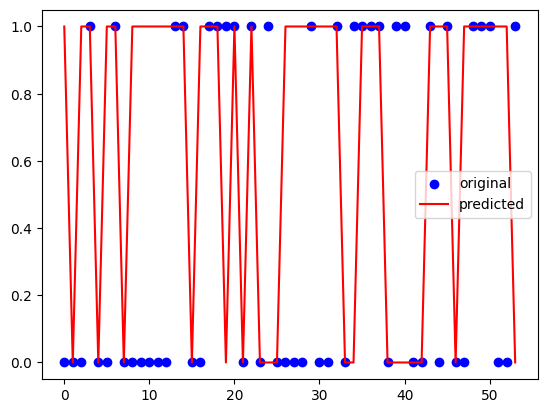

In [ ]:
y = y_test
yhat = predictions4
x = list(range(len(y)))

plt.scatter(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
input_data = (62,0,0)

#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = svm.predict(input_data_reshaped)
print(prediction)

if(prediction[0]== 0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')

[0]
The person does not have a heart disease


In [ ]:
import pickle

filename= 'heart_disease_model.sav'
pickle.dump(XGB1, open(filename, 'wb'))

#loding the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

for columns in x.heart_data:
  print(columns)

NameError: ignored